# Query the database with minimal configuration

This notebook shows how to query the `seq` database from Python 3.

Install `datajoint`:
```
pip3 install datajoint
```
or upgrade
```
pip3 install --upgrade datajoint
```

Obtain your credentials: `username`, and `password` from the database administrator.

In [1]:
import datajoint as dj

DataJoint 0.5.0 (March 8, 2017)
No config file found, using default settings.


In [2]:
# setup connection
dj.config['database.host'] = 'datajoint.ninai.org'
dj.config['database.user'] = 'dimitri' 

In [3]:
# connect to schema by creating a virtual module
seq = dj.create_virtual_module('seq', 'seq_seq')

Please enter DataJoint password: ········
Connecting dimitri@datajoint.ninai.org:3306


In [9]:
# preview the contents of a table
seq.Genome()

assembly short name of genome assembly,species short name of species,source_location a file or ftp or
eGFP,,
hg19,human,ftp://hgdownload.soe.ucsc.edu/goldenPath/hg19/chromosomes/
hg38,human,ftp://hgdownload.soe.ucsc.edu/goldenPath/hg38/chromosomes/
mm10,mouse,ftp://hgdownload.soe.ucsc.edu/goldenPath/mm10/chromosomes/
mm9,mouse,ftp://hgdownload.soe.ucsc.edu/goldenPath/mm9/chromosomes/
RFP,,


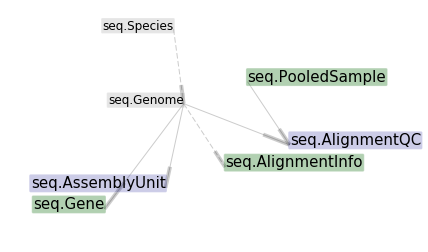

In [22]:
# plot the neighborhood of a specific table:
(dj.ERD(seq.Genome)+1-1).draw()

In [8]:
# restrict to a specific condition
seq.AnnotatedGene() & dict(assembly_unit='chr3')

annotation_db name of annotation database,version version number of annotation database,assembly short name of genome assembly,assembly_unit short name of assembly unit,"ann_gene unique id for gene annotation within the assmebly unit, i.e. from RefSeq",ann_tx name of transcript corresponding to annotation,tx_start transcription start site with respect to assmebly unit,gene_symbol official gene symbol,"ann_strand strand orientation, + or -",tx_end transcription end site with respect to assmebly unit,cds_start coding region start site with respect to assmebly unit,cds_end coding region end site with respect to assembly unit,cds_start_stat quality of information regarding coding start site,cds_end_stat quality of information regarding coding end site,exon_count number of annotated exons
RefSeq,1,mm10,chr3,0,NM_025822,66985671,Rsrc1,+,67358403,66994518,67356313,cmpl,cmpl,10
RefSeq,1,mm10,chr3,1,NR_045167,58692588,4930593A02Rik,+,58788524,58788524,58788524,unk,unk,8
RefSeq,1,mm10,chr3,10,NM_001163328,13471654,Ralyl,+,14182287,13776847,14181055,cmpl,cmpl,9
RefSeq,1,mm10,chr3,10,NM_133218,9427009,Zfp704,-,9610085,9438786,9609719,cmpl,cmpl,9
RefSeq,1,mm10,chr3,10,NM_178631,13471654,Ralyl,+,14182287,13776847,14181055,cmpl,cmpl,10
RefSeq,1,mm10,chr3,10,NR_040598,13597138,4930539N22Rik,-,13652865,13652865,13652865,unk,unk,4
RefSeq,1,mm10,chr3,100,NM_031197,28697902,Slc2a2,+,28728360,28698016,28727476,cmpl,cmpl,11


In [17]:
# join two table into one and restrict
q = seq.Genome() * seq.AnnotatedGene() & 'species <> "human"'
q

assembly short name of genome assembly,annotation_db name of annotation database,version version number of annotation database,assembly_unit short name of assembly unit,"ann_gene unique id for gene annotation within the assmebly unit, i.e. from RefSeq",ann_tx name of transcript corresponding to annotation,tx_start transcription start site with respect to assmebly unit,species short name of species,source_location a file or ftp or,gene_symbol official gene symbol,"ann_strand strand orientation, + or -",tx_end transcription end site with respect to assmebly unit,cds_start coding region start site with respect to assmebly unit,cds_end coding region end site with respect to assembly unit,cds_start_stat quality of information regarding coding start site,cds_end_stat quality of information regarding coding end site,exon_count number of annotated exons
mm10,RefSeq,1,chr1,0,NM_001008533,134199214,mouse,ftp://hgdownload.soe.ucsc.edu/goldenPath/mm10/chromosomes/,Adora1,-,134235457,134202950,134234355,cmpl,cmpl,2
mm10,RefSeq,1,chr1,0,NM_001039510,134199214,mouse,ftp://hgdownload.soe.ucsc.edu/goldenPath/mm10/chromosomes/,Adora1,-,134235457,134202950,134234355,cmpl,cmpl,3
mm10,RefSeq,1,chr1,0,NM_001282945,134199214,mouse,ftp://hgdownload.soe.ucsc.edu/goldenPath/mm10/chromosomes/,Adora1,-,134235457,134202950,134234355,cmpl,cmpl,3
mm10,RefSeq,1,chr1,0,NM_001291928,134199214,mouse,ftp://hgdownload.soe.ucsc.edu/goldenPath/mm10/chromosomes/,Adora1,-,134234856,134202950,134234733,cmpl,cmpl,2
mm10,RefSeq,1,chr1,0,NM_001291930,134199214,mouse,ftp://hgdownload.soe.ucsc.edu/goldenPath/mm10/chromosomes/,Adora1,-,134235457,134202950,134203505,cmpl,cmpl,2
mm10,RefSeq,1,chr1,1,NM_001289704,58711490,mouse,ftp://hgdownload.soe.ucsc.edu/goldenPath/mm10/chromosomes/,Cflar,+,58759209,58726436,58753922,cmpl,cmpl,10
mm10,RefSeq,1,chr1,1,NM_001290390,8359738,mouse,ftp://hgdownload.soe.ucsc.edu/goldenPath/mm10/chromosomes/,Sntg1,-,9299877,8363474,8803943,cmpl,cmpl,21


In [20]:
# project select subset of columns:
q = q.proj('cds_start', 'cds_end')
q

assembly short name of genome assembly,annotation_db name of annotation database,version version number of annotation database,assembly_unit short name of assembly unit,"ann_gene unique id for gene annotation within the assmebly unit, i.e. from RefSeq",ann_tx name of transcript corresponding to annotation,tx_start transcription start site with respect to assmebly unit,cds_start coding region start site with respect to assmebly unit,cds_end coding region end site with respect to assembly unit
mm10,RefSeq,1,chr1,0,NM_001008533,134199214,134202950,134234355
mm10,RefSeq,1,chr1,0,NM_001039510,134199214,134202950,134234355
mm10,RefSeq,1,chr1,0,NM_001282945,134199214,134202950,134234355
mm10,RefSeq,1,chr1,0,NM_001291928,134199214,134202950,134234733
mm10,RefSeq,1,chr1,0,NM_001291930,134199214,134202950,134203505
mm10,RefSeq,1,chr1,1,NM_001289704,58711490,58726436,58753922
mm10,RefSeq,1,chr1,1,NM_001290390,8359738,8363474,8803943


In [23]:
# fetch the all the data:
q.fetch()

array([ ('mm10', 'RefSeq', 1, 'chr1', '0', 'NM_001008533', 134199214, 134202950, 134234355),
       ('mm10', 'RefSeq', 1, 'chr1', '0', 'NM_001039510', 134199214, 134202950, 134234355),
       ('mm10', 'RefSeq', 1, 'chr1', '0', 'NM_001282945', 134199214, 134202950, 134234355),
       ...,
       ('mm10', 'RefSeq', 1, 'chrY', '992', 'NM_001025241',  53415956, 53416091, 53416775),
       ('mm10', 'RefSeq', 1, 'chrY', '995', 'NM_001037748',  53843936, 53845367, 53869954),
       ('mm10', 'RefSeq', 1, 'chrY', '998', 'NM_001160129',  54185856, 54185986, 54186670)], 
      dtype=[('assembly', 'O'), ('annotation_db', 'O'), ('version', '<i8'), ('assembly_unit', 'O'), ('ann_gene', 'O'), ('ann_tx', 'O'), ('tx_start', '<i8'), ('cds_start', 'O'), ('cds_end', 'O')])

In [26]:
# fetch a specific attribte
cds_start, cds_end = q.fetch['cds_start', 'cds_end']
cds_start

array([134202950, 134202950, 134202950, ..., 53416091, 53845367, 54185986], dtype=object)